# Task04: Analysis on Out_task00 data

__Goal__ : Which station reported the highest or lowest temperature each year??

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

__Read and clean data from task00__

In [2]:
df = pd.read_csv("./outputs/out_task00", sep="\t|,", engine="python", skipfooter=1)

In [3]:
df.columns = ['id', 'station_id', 'year', 'month', 'temp']
col_names = df.columns

for col in col_names:
    df[col] = df[col].map(lambda x: str(x).lstrip('[').rstrip(']')).astype(float)

df = df.astype({'id': int, 'station_id': int, 'year': int, 'month' : int})    

In [4]:
new_df = df[['id','year','temp']]
new_df.head()

,id,year,temp
0,100010,1931,43.0
1,100010,1931,39.0
2,100010,1931,39.0
3,100010,1931,36.0
4,100010,1931,36.0


__Check for any missing values__

In [5]:
new_df.isnull().values.any()

False

## Maximum temp

In [6]:
table_max = pd.pivot_table(new_df, values='temp', index=['id'],
                    columns=['year'], aggfunc=np.max, fill_value=0)
table_max

year,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,...,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940
id,,,,,,,,,,,,,,,,,,,,,
10010,0,0,0,0,0,0,0,0,0,0,...,55,63,99,82,52,54,68,77,0,0
10050,0,0,0,0,0,0,0,0,0,0,...,70,0,64,63,54,50,54,61,0,0
10100,0,0,0,0,0,0,0,0,0,0,...,73,66,75,77,68,75,79,0,0,0
10280,0,0,0,0,0,0,0,0,0,0,...,90,59,68,77,59,57,59,59,0,0
10550,0,0,0,0,0,0,0,0,0,0,...,70,64,64,66,61,66,77,77,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,110
956770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,108
958660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,104


In [7]:
max_index = table_max.idxmax()
max_index_df = max_index.to_frame()

In [8]:
max_temp = table_max.max()
max_temp_df = max_temp.to_frame()

In [9]:
result_max = pd.concat([max_index_df, max_temp_df], axis=1)
result_max['Group'] = 'Max'
result_max.columns = ['id', 'temp', 'Group']
result_max

,id,temp,Group
year,,,
1901,29720,89,Max
1902,227070,76,Max
1903,227070,84,Max
1904,29720,78,Max
1905,227070,83,Max
1906,29440,85,Max
1907,29440,83,Max
1908,29440,84,Max
1909,28750,82,Max


## Minimum temp

In [10]:
table_min = pd.pivot_table(new_df, values='temp', index=['id'],
                    columns=['year'], aggfunc=np.min, fill_value=0)
table_min

year,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,...,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940
id,,,,,,,,,,,,,,,,,,,,,
10010,0,0,0,0,0,0,0,0,0,0,...,-2,-8,-13,-26,-4,1,-8,1,0,0
10050,0,0,0,0,0,0,0,0,0,0,...,-18,0,-11,-15,-4,-20,-18,-4,0,0
10100,0,0,0,0,0,0,0,0,0,0,...,9,-11,1,18,16,14,-4,0,0,0
10280,0,0,0,0,0,0,0,0,0,0,...,-49,-8,-2,-2,1,-36,-15,-2,0,0
10550,0,0,0,0,0,0,0,0,0,0,...,-4,14,14,18,10,9,10,18,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30
956770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35
958660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,32


In [11]:
min_index = table_min.idxmin()
min_index_df = min_index.to_frame()

In [12]:
min_temp = table_min.min()
min_temp_df = min_temp.to_frame()

In [13]:
result_min = pd.concat([min_index_df, min_temp_df], axis=1)
result_min['Group'] = 'Min'
result_min.columns = ['id', 'temp', 'Group']
result_min

,id,temp,Group
year,,,
1901,227070,-28,Min
1902,29600,-27,Min
1903,227070,-23,Min
1904,29600,-21,Min
1905,227070,-27,Min
1906,28750,-13,Min
1907,29170,-31,Min
1908,28060,-36,Min
1909,28060,-36,Min


In [14]:
result_max = result_max.reset_index()
result_min = result_min.reset_index()

frames = [result_max, result_min]

final_result = pd.concat(frames, keys=['year','Group'])
final_result


year      id  temp Group
year  0   1901   29720    89   Max
      1   1902  227070    76   Max
      2   1903  227070    84   Max
      3   1904   29720    78   Max
      4   1905  227070    83   Max
...        ...     ...   ...   ...
Group 35  1936  719460   -66   Min
      36  1937  710435   -60   Min
      37  1938  719650   -58   Min
      38  1939  710435   -60   Min
      39  1940  106874   -56   Min

[80 rows x 4 columns]

In [15]:
final_result.dtypes

year      int64
id        int64
temp      int64
Group    object
dtype: object

<Figure size 3600x576 with 0 Axes>

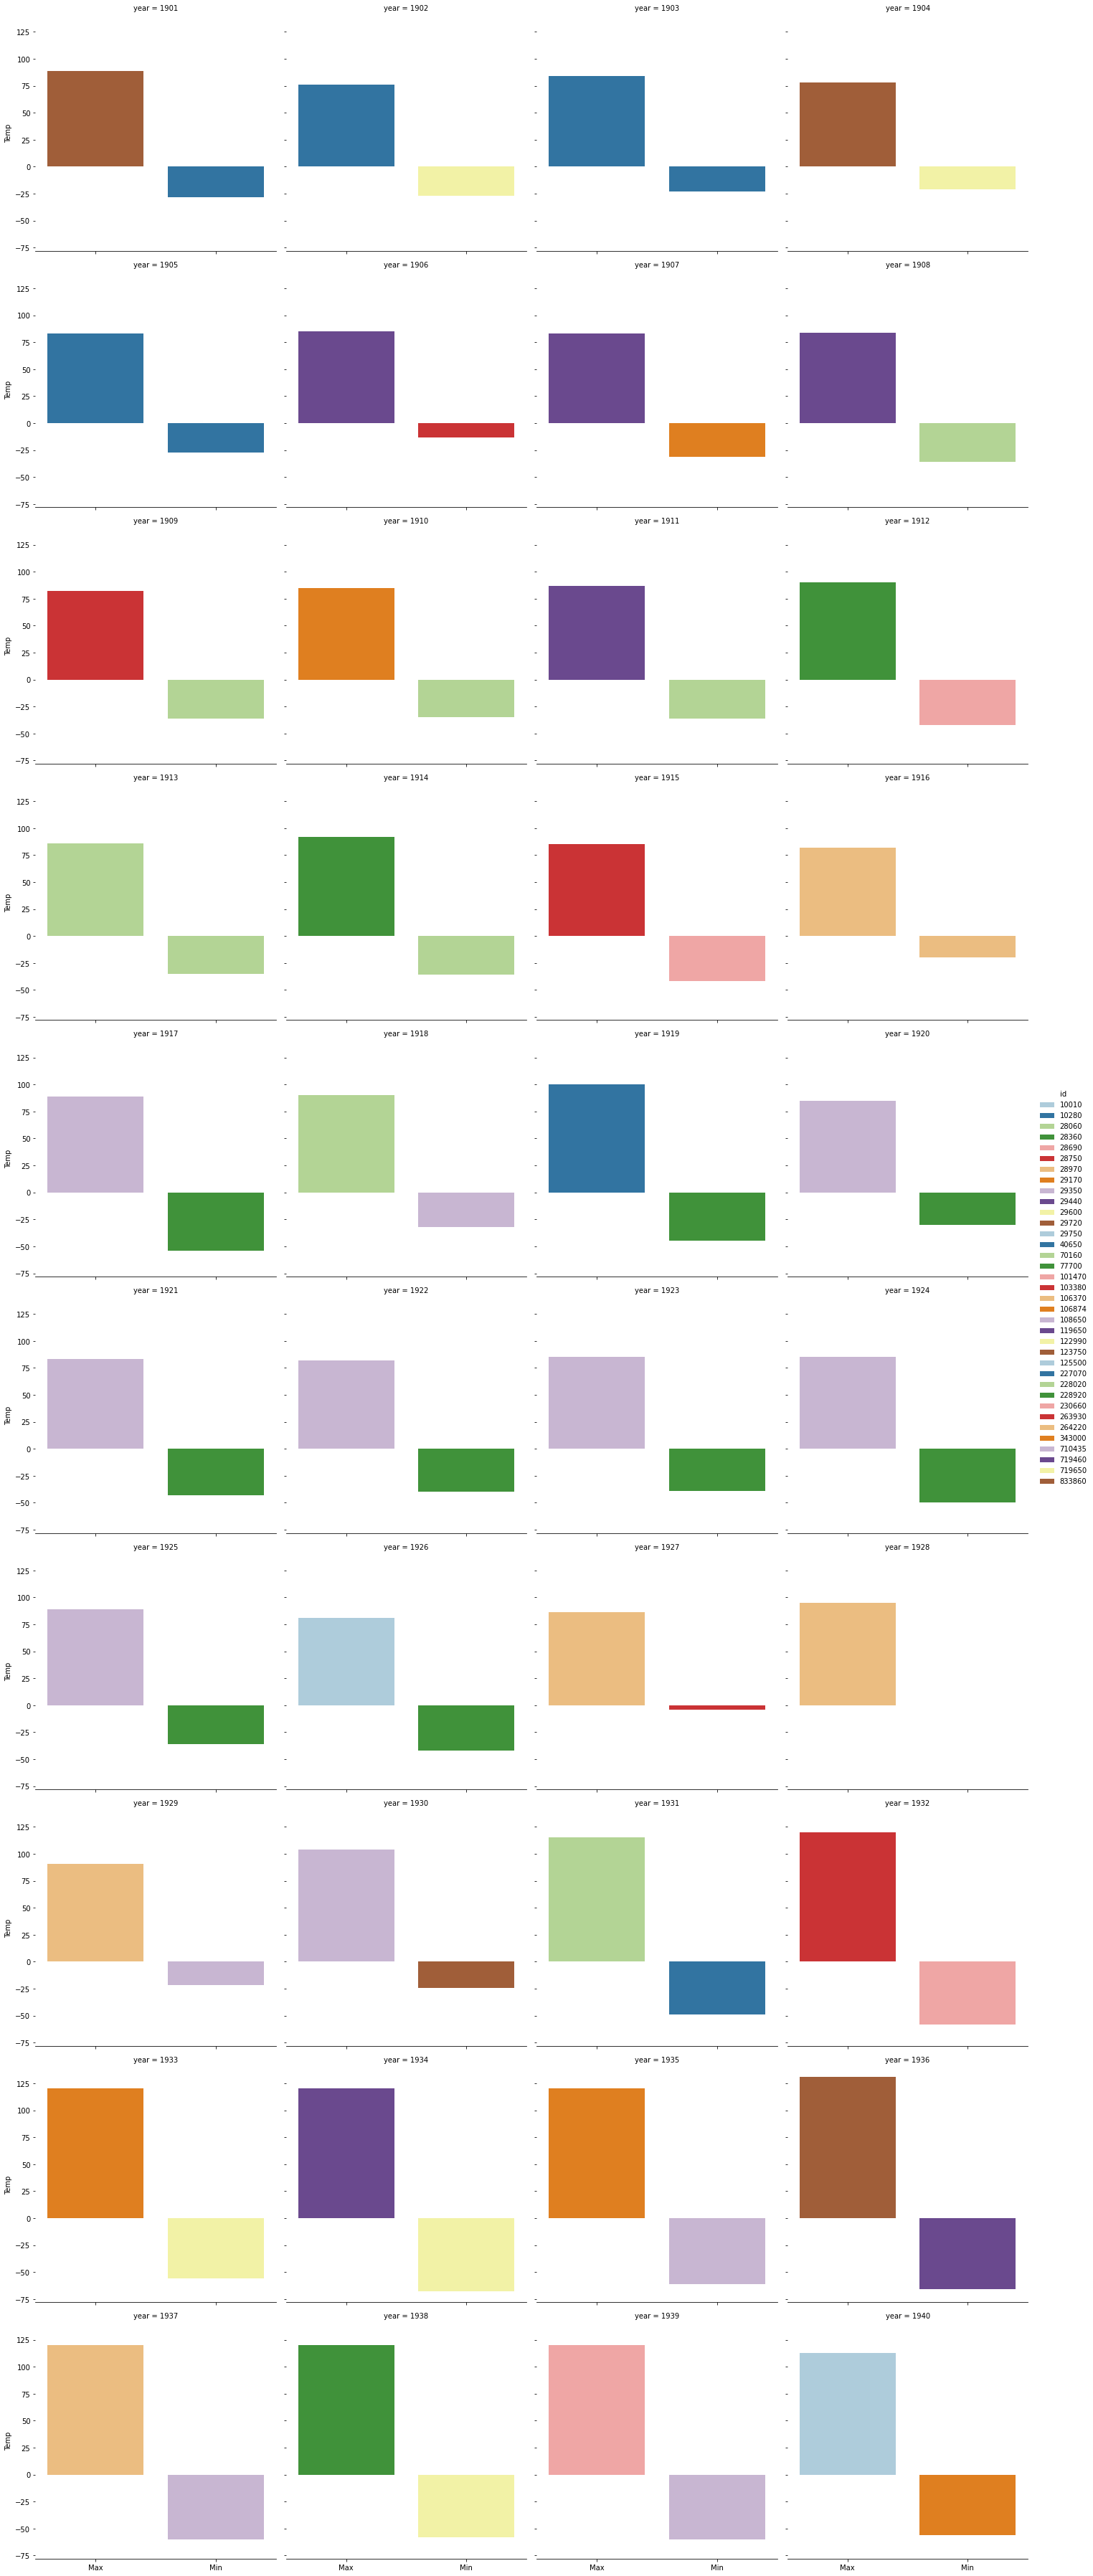

In [18]:
plt.figure(figsize = (50,8))
g = sns.catplot(x='Group', y='temp', col='year', 
                kind='bar', hue='id',
                col_wrap=4, data=final_result, height=5, palette = "Paired", dodge=False)

(g.set_axis_labels("", "Temp")
  .set_xticklabels(["Max", "Min"])
  .despine(left=True))  

g.savefig('task04.png', dpi=300)
